# KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("D:\Ineuron Data Science\Data\glass.csv")

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.shape

(214, 10)

In [5]:
data['Type'].value_counts().sort_index()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

In [6]:
data.duplicated().sum()

1

In [7]:
data = data.drop_duplicates()

In [8]:
data.duplicated().sum()

0

In [9]:
x = data.iloc[:,:-1]

In [10]:
y = data.iloc[:,-1]

In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [12]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


### Wherever we have a distance in the algo will use the scalling 
#### to scale the data into same scale this scalling is required

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [14]:
# scalling 
scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)

In [15]:
x_train_sc

array([[0.43862816, 0.3496063 , 0.94472362, ..., 0.29583802, 0.        ,
        0.        ],
       [0.28459687, 0.32913386, 0.85678392, ..., 0.29246344, 0.        ,
        0.37254902],
       [0.35740072, 0.31023622, 0.8718593 , ..., 0.26884139, 0.        ,
        0.        ],
       ...,
       [0.3700361 , 0.20787402, 0.68341709, ..., 0.38695163, 0.        ,
        0.        ],
       [0.62394705, 0.31811024, 0.91708543, ..., 0.45669291, 0.        ,
        0.33333333],
       [0.41877256, 0.36220472, 0.96733668, ..., 0.26209224, 0.        ,
        0.        ]])

In [16]:
x_test_sc

array([[0.59416446, 0.16901408, 0.        , 0.44520548, 0.68587896,
        0.13043478, 0.72583643, 0.        , 1.        ],
       [0.42882405, 0.68309859, 1.        , 0.17808219, 0.56772334,
        0.00966184, 0.30855019, 0.        , 0.        ],
       [0.34792219, 0.77699531, 0.79732739, 0.27054795, 0.65417867,
        0.09017713, 0.26672862, 0.        , 0.        ],
       [0.        , 0.69483568, 0.71269488, 0.42123288, 0.86455331,
        0.28341385, 0.        , 0.37777778, 0.        ],
       [0.34394341, 0.74178404, 0.78619154, 0.25342466, 0.57636888,
        0.0821256 , 0.31133829, 0.03492063, 0.        ],
       [0.31211317, 0.5657277 , 0.6325167 , 0.23972603, 0.87608069,
        0.08856683, 0.33828996, 0.        , 0.        ],
       [0.88152078, 0.        , 0.        , 0.52054795, 0.        ,
        0.09339775, 0.73141264, 1.        , 0.82352941],
       [0.41998232, 0.71596244, 0.5077951 , 0.29109589, 0.62824207,
        0.07890499, 0.41078067, 0.        , 0.5       ],


In [17]:
def knn_training(x_train_sc,y_train,x_test_sc,k):
    '''
    x_train = traning data
    y_train = label for the training
    x_test = it is for validation 
    k = number of nearest neighbour
    '''

    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train_sc,y_train) 
    prediction = knn.predict(x_test_sc)
    return prediction

1. how to decide the number of k 
* heuristics method = sqrt of total record = this as a nearest neighbor 
* based on research = you can take diff diff values of k = starting from 1 to n<br> n = total number of instences


2. pros and cons of knn



In [18]:
import math
n = data.shape[0]
k = math.sqrt(n)

In [19]:
k = int(k)

In [20]:
pred = knn_training(x_train_sc,y_train,x_test_sc,k)

In [21]:
print(pred)

[5 1 1 2 1 1 7 2 1 1 7 1 7 6 1 2 2 1 2 1 1 1 7 7 2 1 2 7 2 5 1 1 2 7 2 1 7
 1 2 2 1 7 1 6 1 1 1 2 5 2 1 2 2 2]


In [22]:
accuracy_score(y_test,pred)

0.5370370370370371

New approch here we will decide the k value

In [31]:
k_value = range(1,21)
accuracy=[]

for k in k_value:
    y_pred = knn_training(x_train_sc,y_train,x_test_sc,k)
    accur = accuracy_score(y_test,y_pred)
    accuracy.append(accur)
    print(f"for this k value {k} this is my accuracy {accur} ")

for this k value 1 this is my accuracy 0.5740740740740741 
for this k value 2 this is my accuracy 0.7037037037037037 
for this k value 3 this is my accuracy 0.6666666666666666 
for this k value 4 this is my accuracy 0.6481481481481481 
for this k value 5 this is my accuracy 0.5555555555555556 
for this k value 6 this is my accuracy 0.5740740740740741 
for this k value 7 this is my accuracy 0.5555555555555556 
for this k value 8 this is my accuracy 0.5555555555555556 
for this k value 9 this is my accuracy 0.5370370370370371 
for this k value 10 this is my accuracy 0.5185185185185185 
for this k value 11 this is my accuracy 0.5555555555555556 
for this k value 12 this is my accuracy 0.5370370370370371 
for this k value 13 this is my accuracy 0.5925925925925926 
for this k value 14 this is my accuracy 0.5370370370370371 
for this k value 15 this is my accuracy 0.5555555555555556 
for this k value 16 this is my accuracy 0.5185185185185185 
for this k value 17 this is my accuracy 0.4629629

In [32]:
max(accuracy)

0.7037037037037037

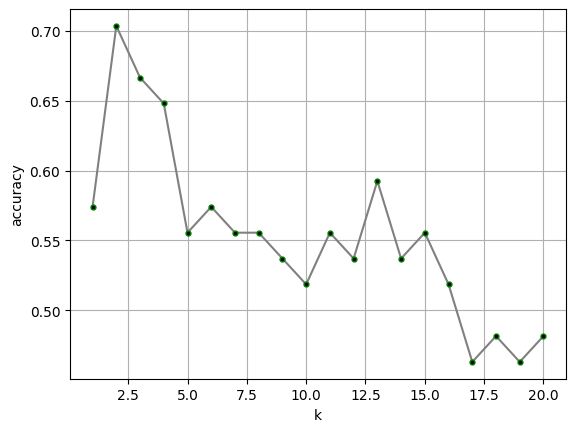

In [33]:
plt.plot(k_value,accuracy,c="grey",marker = ".",ms=7,mfc="black",mec="green")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()